#test file

In [2]:
import matplotlib.pyplot as plt 
import csv 
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns




In [3]:
csvfile = open('/home/oscar/jufobtc/code/test_comp_time.csv','r')
colnames = ['time_stamp', 'dif_time','block_height']
df1 = pd.read_csv(csvfile,delimiter=' ', names=colnames)
df1['dif_time'] = (df1['dif_time'])/3600
print(df1)

                                                time_stamp   dif_time  \
0        c17d8179d792928bb017d12654cd12c72aca35ca0cb258...   0.058629   
1        a795b27a52e74f07bf9def3edad50a06db902ee173d30b...   0.031856   
2        c1b7b41cc7bc40fe528a08528ae150e2fdab6aa8501dd1...   0.039613   
3        35064cb6846becca4594ccb45814a838039be1f08d3c04...   0.023705   
4        d063d5ed3e9dcb4510fe39ef31ac4240acd8b30fe34a48...   0.035817   
...                                                    ...        ...   
9898468  9e9e68b63fadc90bb9e7b7d302feb3800ac1254348c13f...  87.936507   
9898469  4bb480f0af9f507f0633931060a6c005c02678efae645c...  87.858326   
9898470  fc854fd00b9d59f63454fcdfec7783a08e81e84b666742...  87.844441   
9898471  895305646042c170f87606a5dfd63cfe2f2fd5872d484f...  87.947752   
9898472  a32fdcc34609289d06fb73e5faefd505585d0600beac8b...  87.947752   

         block_height  
0              650000  
1              650000  
2              650000  
3              650000  
4  

In [9]:
csvfile2 = open('/home/oscar/jufobtc/code/fee_vybte_per_block_650000_657000.csv','r')
colnames2 = ['time_stamp', 'block_height','fee_per_vybte']
df2 = pd.read_csv(csvfile2,delimiter=' ', names=colnames2)
print(df2)  

       time_stamp  block_height  fee_per_vybte
0      1601077461        650001      22.292135
1      1601077784        650002      21.040189
2      1601078147        650003      33.012255
3      1601078753        650004      51.644981
4      1601078976        650005      20.168499
...           ...           ...            ...
64593  1639145517        713534      11.640212
64594  1639146180        713535      14.180824
64595  1639146337        713536       7.437159
64596  1639146565        713537      11.706733
64597  1639147370        713538      17.472593

[64598 rows x 3 columns]


In [10]:
start_height_df2 = df2['block_height'].min()
end_height_df2 = df2['block_height'].max()

Text(0.5, 1.0, 'Conf Time vs. average fee per vbyte')

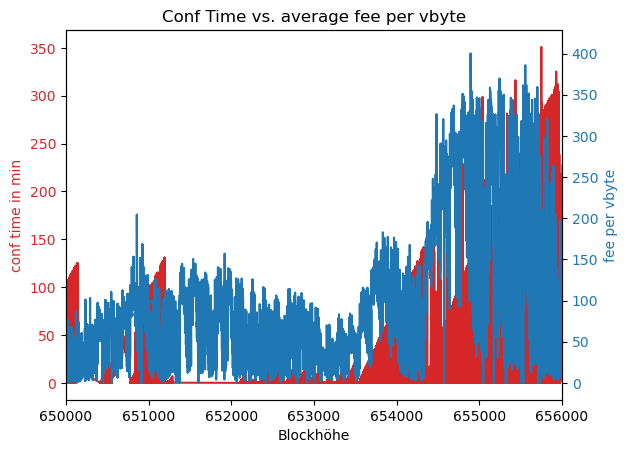

In [10]:
""""
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Blockhöhe')
ax1.set_ylabel('conf time in min', color=color)
ax1.plot(df1['block_height'], df1['dif_time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('fee per vbyte', color=color)  # we already handled the x-label with ax1
ax2.plot(df2['block_height'], df2['fee_per_vybte'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xlim(650000,656000)
plt.title('Conf Time vs. average fee per vbyte')
"""

Text(0.5, 1.0, 'Conf Time vs. average fee per vbyte')

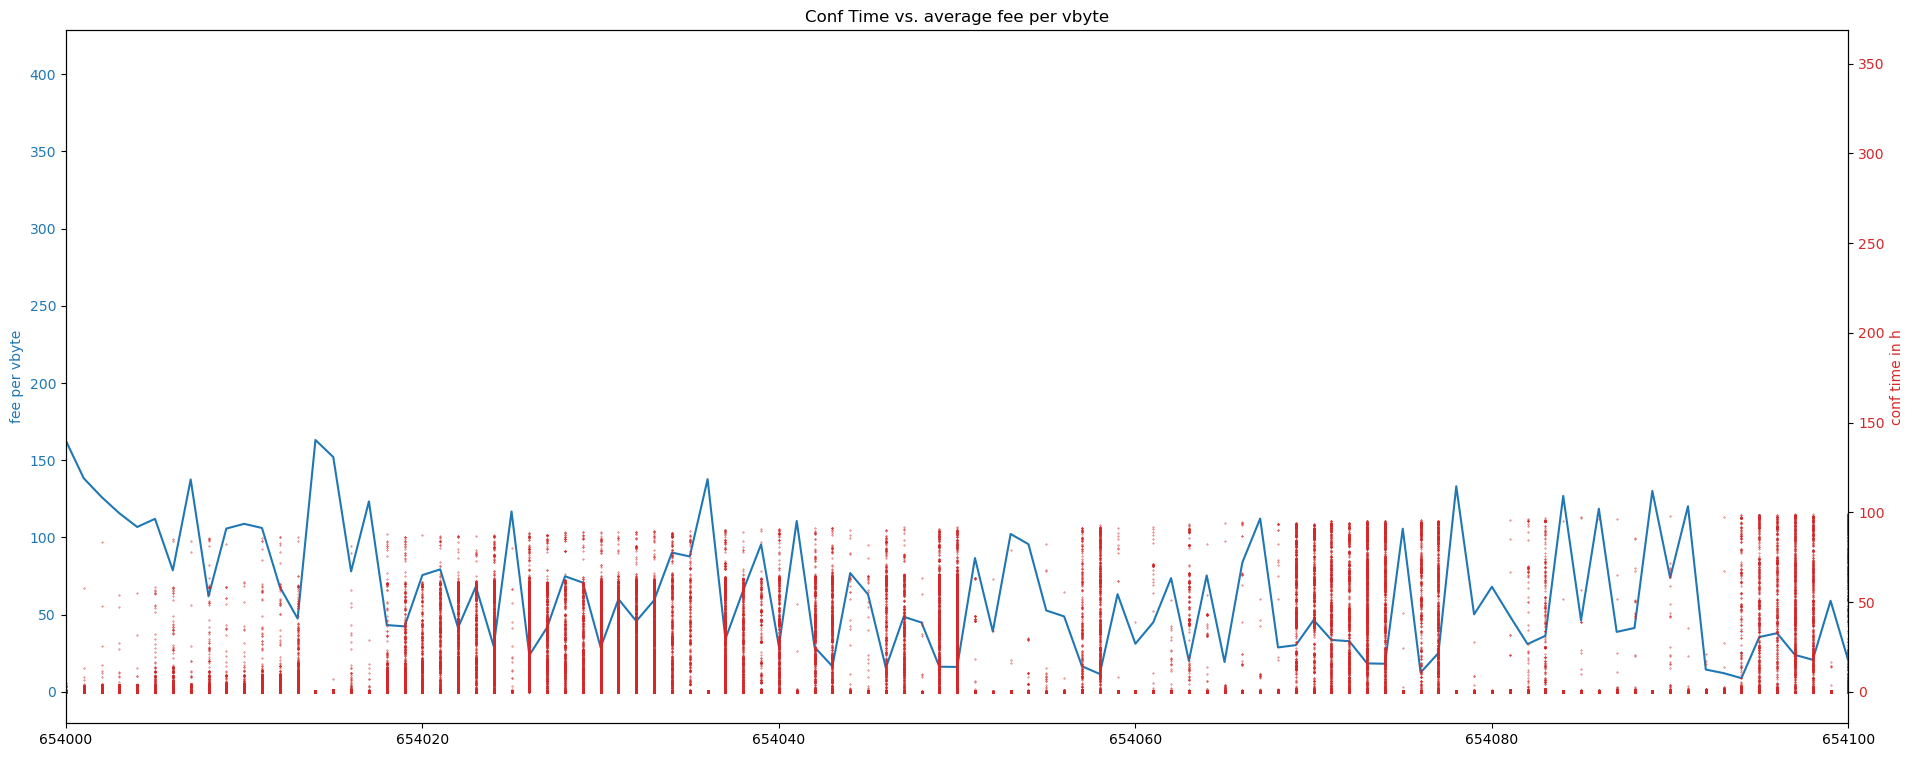

In [15]:
fig, ax1 = plt.subplots(figsize=(23,9))
#plt.figure(figsize=(23,9))
color = 'tab:blue'
ax1.set_ylabel('fee per vbyte', color=color)  
ax1.plot(df2['block_height'], df2['fee_per_vybte'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_xlabel('Blockhöhe')
ax2.set_ylabel('conf time in h', color=color)
ax2.scatter(df1['block_height'], df1['dif_time'], color=color, s=0.1)
ax2.tick_params(axis='y', labelcolor=color)

plt.xlim(654000,654100)
plt.title('Conf Time vs. average fee per vbyte')


Text(0.5, 0, 'dif_time')

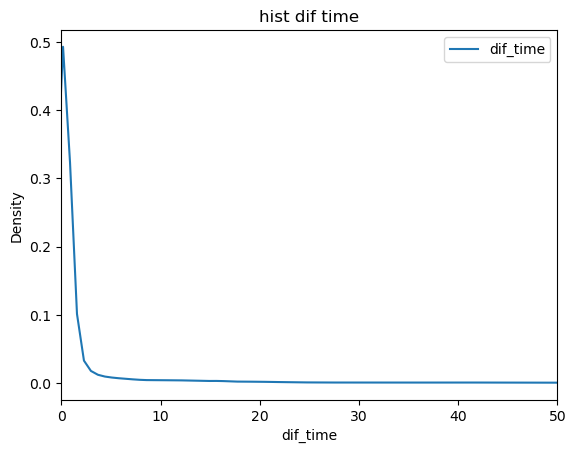

In [7]:
df1.plot(kind='kde', x='block_height', y='dif_time')
plt.title('hist dif time')
plt.xlim(0,50)
plt.xlabel('dif_time')



In [10]:
data = df2['fee_per_vybte']
count, bins_count = np.histogram(data, bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
x = bins_count[1:]



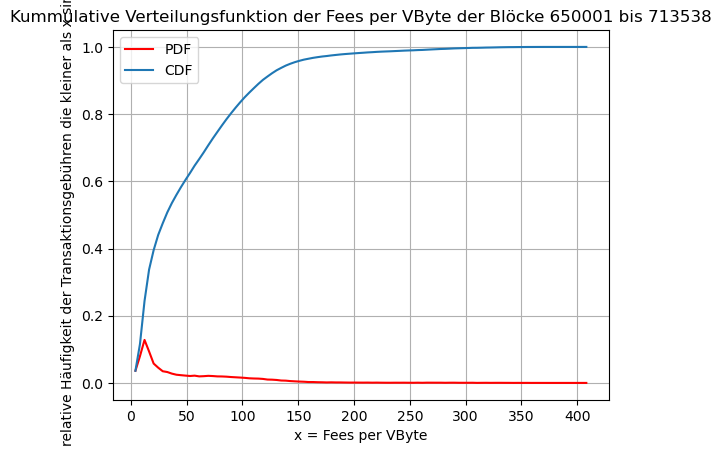

In [18]:
plt.plot(x, pdf, color="red", label="PDF") 
plt.plot(x, cdf, label="CDF") 
plt.grid()
plt.title('Kummulative Verteilungsfunktion der Fees per VByte der Blöcke {} bis {}'.format(start_height_df2, end_height_df2))
plt.plot
plt.ylabel('relative Häufigkeit der Transaktionsgebühren die kleiner als x sind')
plt.xlabel('x = Fees per VByte')
#plt.xlim(0,50)
plt.legend()

Text(0.5, 0, 'x = Fees per VByte')

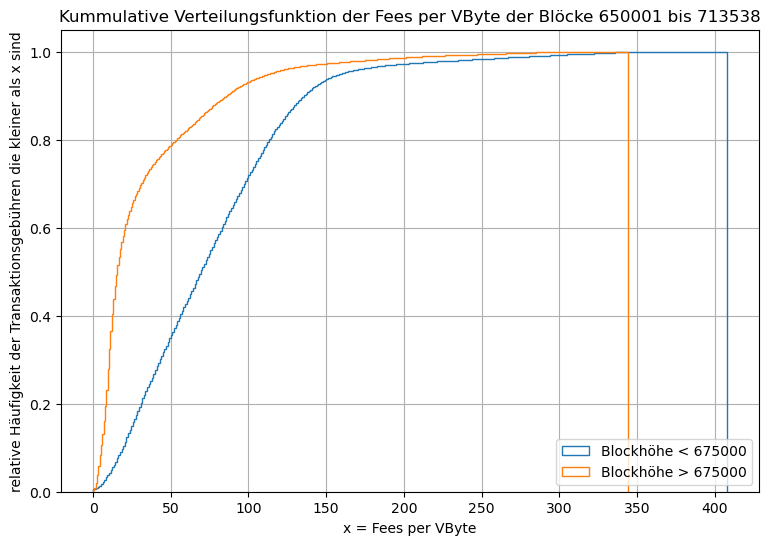

In [34]:
plt.figure(figsize=(9,6))
df2_new = df2.loc[df2['block_height']<675000]
data = df2_new['fee_per_vybte']
plt.hist(data, cumulative=True, density=True, histtype='step',bins=400, label='Blockhöhe < 675000')
df2_new = df2.loc[df2['block_height']>675000]
data = df2_new['fee_per_vybte']
plt.hist(data, cumulative=True, density=True, histtype='step', bins=400, label='Blockhöhe > 675000')
plt.grid()
plt.legend(loc='lower right')
plt.title('Kummulative Verteilungsfunktion der Fees per VByte der Blöcke {} bis {}'.format(start_height_df2, end_height_df2))
plt.ylabel('relative Häufigkeit der Transaktionsgebühren die kleiner als x sind')
plt.xlabel('x = Fees per VByte')


Text(0.5, 0, 'fee per vbyte')

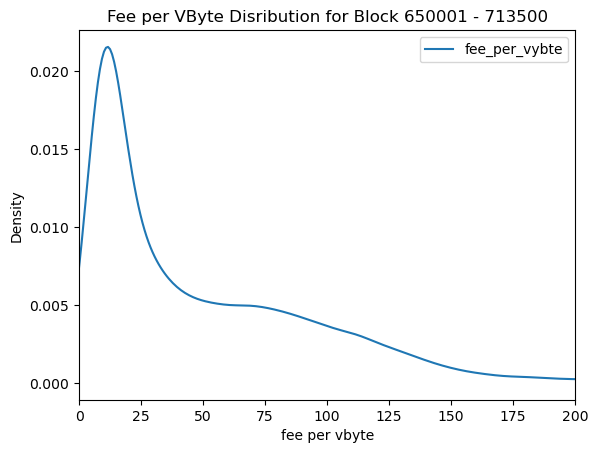

In [34]:
df2.plot(kind='kde', x='block_height', y='fee_per_vybte')
plt.title('Fee per VByte Disribution for Block 650001 - 713500')
plt.xlim(0,200)
plt.xlabel('fee per vbyte')

#print(df2)



TypeError: Value after * must be an iterable, not int